In [142]:
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp, logit_to_probability


trace_file = ""
variable_list = ['g_mp']
graph_title =  "" #"Module effect on iterations (log-scale)"
file_name = ""



transformations = {
    #'g_mp': logit_to_probability,

}

table_location = f"tables/{file_name}.csv"
image_location = f"images/{file_name}.pdf"


### Generate Summary object

In [143]:
import arviz as az
import pandas as pd
from utils.inference_data_helper import create_inference_data_from_trace, log_to_exp
pd.set_option('display.max_rows', 500)  # Increase number of rows

# Example usage
trace = az.from_netcdf(trace_file)

idata = create_inference_data_from_trace(trace, variable_list, transformations)
summary = az.summary(idata, variable_list, hdi_prob=0.89)


### Replace numeric identifiers with descriptive identifiers

In [144]:
from utils.summary_table_formatting import update_table, get_replacement_list
from utils.design_matrix_creator import get_design_matricies

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")

_, module_matrix, parameter_matrix, interaction_matrix = get_design_matricies(data, 'AlgorithmIterations')

module_names = get_replacement_list(module_matrix.columns)
parameter_names = get_replacement_list(parameter_matrix.columns)
interaction_names = get_replacement_list(interaction_matrix.columns)

update_table(summary, 'a_m', replacement=module_names)
update_table(summary, 'b_p', replacement=parameter_names)
update_table(summary, 'g_mp', replacement=interaction_names)

summary = summary.sort_values(by='mean', ascending=True)
summary

Module Matrix shape: (9360, 24)
Parameter Matrix shape: (9360, 12)
Interaction Matrix shape: (9360, 288)
Observation Matrix shape: (9360, 1)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_mp[positional_validation x TestInsertionProb],-0.034,0.021,-0.067,-0.001,0.0,0.0,32378.0,14159.0,1.0
g_mp[python x TestInsertionProb],-0.034,0.021,-0.066,0.000,0.0,0.0,29527.0,13739.0,1.0
g_mp[namedtupleutils x Elite],-0.033,0.021,-0.068,-0.002,0.0,0.0,32056.0,14225.0,1.0
g_mp[helpers x Crossover],-0.031,0.021,-0.064,0.002,0.0,0.0,29970.0,14383.0,1.0
g_mp[namedtupleutils x TourSize],-0.031,0.021,-0.064,0.002,0.0,0.0,33985.0,14953.0,1.0
g_mp[decorators x Pop],-0.030,0.021,-0.065,0.002,0.0,0.0,33054.0,13605.0,1.0
g_mp[python x Crossover],-0.029,0.021,-0.062,0.004,0.0,0.0,30049.0,14704.0,1.0
g_mp[config x TourSize],-0.027,0.020,-0.059,0.005,0.0,0.0,36215.0,14802.0,1.0
g_mp[return_from_generator x ChromLen],-0.027,0.020,-0.058,0.007,0.0,0.0,35838.0,14611.0,1.0
g_mp[helpers x Pop],-0.026,0.020,-0.058,0.007,0.0,0.0,36058.0,15025.0,1.0


### Save summary table as CSV

In [145]:
summary.to_csv(table_location, index=True)

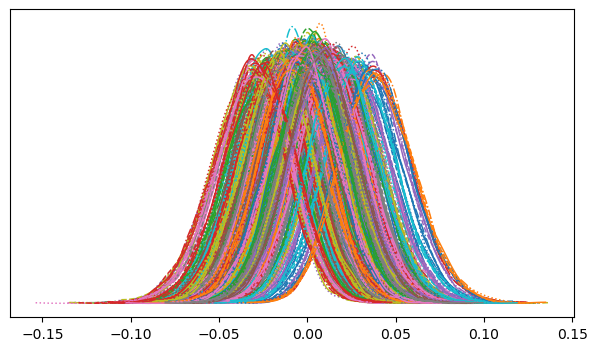

In [146]:
import arviz as az
import matplotlib.pyplot as plt

axes = az.plot_trace(idata, var_names=variable_list, figsize=(16, 4))
for ax in axes[:, 1]:  # Assumes trace plots are in the second column
    ax.set_visible(False)

for ax_row in axes:
    ax_row[0].set_title(graph_title)


plt.savefig(image_location, format='pdf', bbox_inches='tight')
plt.show()